# Welcome!

Today we're going to present last-time's topic - **Linear Regression** in a more generalized way. You'll see that this algorithm doesn't change a lot, when we want to fit our model to more features than just one!

This will be an occasion to introduce and tackle some problems faced by data scientists on a daily basis, such as:
- data normalization
- regularization of the cost function
- overfitting
- dividing the data into training and test sets

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import ipywidgets as widgets
import solutions

%matplotlib inline

# Problem

## Previously

### $$\hat{y} = h_W(x) = w_0 + w_1x$$ 

## Today

### $$\hat{y} = h_W(x_1, x_2, ..., x_k) = w_0 + w_1x_1+ w_2x_2+ w_3x_3+ ... + w_kx_k = w_0 + \sum_{i=1}^k w_i x_i$$ 

## or:

### $W$ - vector of coefficients or 'weights'

$$ W = [w_0, w_1, ..., w_k]$$

### $X^{(i)}$ - vector of  features of an i-th test case
$$ X^{(i)} = [x^{(i)}_0, x^{(i)}_1, ... x^{(i)}_k] $$
... where $x_0$ = 1, so that
$$h_W(X^{(i)}) = \sum_{j=0}^k w_j x_j = W * X^{(i)}$$


In [2]:
def add_bias_feature(X):
       return np.c_[np.ones(len(X)), X]

X = np.array([[1,2,3], [4,5,6]])
print(X)
print(add_bias_feature(X))

[[1 2 3]
 [4 5 6]]
[[ 1.  1.  2.  3.]
 [ 1.  4.  5.  6.]]


In [3]:
def hypotheses(W, X):
    # W: a vector of weights
    # X: a list of feature vectors of some objects (so effectively a matrix)
    # return a vector of hypotheses for *all* x-s 

SyntaxError: unexpected EOF while parsing (<ipython-input-3-1c2842ad0924>, line 4)

In [4]:
hypotheses = solutions.hypotheses

# Cost function

### $$L = \frac{1}{2N}\sum_{i=0}^N(h_W(x^{(i)}) - y^{(i)})^2 $$
## Previously

### $$L(w_0, w_1) = \frac{1}{2N}\sum_{i=0}^N(w_0 + w_1x^{(i)} - y^{(i)})^2 $$

## Today

### $$L(w_0, w_1, ... w_n) = L(W) = \frac{1}{2N}\sum_{i=0}^N(\sum_{j=0}^k w_j x^{(i)}_j - y^{(i)})^2 = \frac{1}{2N}\sum_{i=0}^N (h_W(x^{(i)}) - y^{(i)})^2$$

In [5]:
def cost(W, X, Y):
    # W: a vector of weights
    # X: a list of feature vectors of some objects (so effectively a matrix)
    # Y: a vector of our values
    # return cost (a scalar)

SyntaxError: unexpected EOF while parsing (<ipython-input-5-c4094194c96f>, line 5)

In [6]:
cost = solutions.cost

# Gradient descent

For every iteration:
* calculate partial derivatives of cost function with respect to every element of W:

$$\epsilon_j = \frac{\partial}{\partial w_j}L(W) = \frac{1}{N} \sum_{i=1}^N(h_W(x^{(i)}) - y^{(i)})x_j^{(i)}$$

* **simultaneously** update every element of W:

$$w_j = w_j - \alpha \epsilon_j$$ 

Where $\alpha$ is our learning rate.

In [7]:
def gradient_step(W, X, Y, learning_rate=0.01):
    # W: a vector of weights
    # X: a list of feature vectors of some objects (so effectively a matrix)
    # Y: a vector of our values
    # return a vector of new values of W

SyntaxError: unexpected EOF while parsing (<ipython-input-7-631c40bd8280>, line 5)

In [8]:
gradient_step = solutions.gradient_step

# Polynomial regression: a possible use case

This is a plot of a secret polynomial:

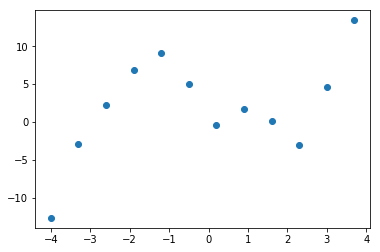

In [73]:
secret = solutions.secret_polynomial
X = np.arange(-4, 4, 0.7)
Y = [secret(x) for x in X]
plt.scatter(X, Y)
plt.show()

What degree of a polynomial could that be?

In [74]:
def to_poly_features(X, proposed_degree):
    # notice that x ** 0 = 1, so bias feature is already added here
    return np.array([[x ** n for n in range(proposed_degree)] for x in X])


In [75]:
proposed_degree = 4
features = to_poly_features(X, proposed_degree)
targets = np.array(Y)
features[0:5]

array([[  1.   ,  -4.   ,  16.   , -64.   ],
       [  1.   ,  -3.3  ,  10.89 , -35.937],
       [  1.   ,  -2.6  ,   6.76 , -17.576],
       [  1.   ,  -1.9  ,   3.61 ,  -6.859],
       [  1.   ,  -1.2  ,   1.44 ,  -1.728]])

## Feature scaling to the rescue!

We want all our features to be roughly in the same range, i.e [-1, 1]. This is called **data normalization**. 

One way to achieve it is **mean normalization**:

$$x_i = \frac{x_i - \mu_i}{max(X) - min(X)}$$

Of course, since $x_0$ is always equal to 1, we don't normalize it!

In [76]:
def mean_normalization(X):
    # implement me!
    # X - a matrix of features
    # return normalized matrix X
    # do not normalize thefirst column of ones!

SyntaxError: unexpected EOF while parsing (<ipython-input-76-0522779538c6>, line 5)

In [77]:
mean_normalization = solutions.mean_normalization

In [78]:
features = mean_normalization(features)
features[0:5]

array([[ 1.        , -0.5       ,  0.63523392, -0.53525856],
       [ 1.        , -0.40909091,  0.31505848, -0.29049393],
       [ 1.        , -0.31818182,  0.05628655, -0.13034984],
       [ 1.        , -0.22727273, -0.14108187, -0.03687649],
       [ 1.        , -0.13636364, -0.27704678,  0.00787594]])

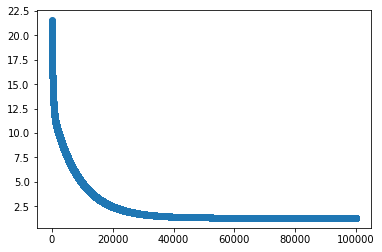

In [96]:
W = np.random.rand(proposed_degree)
costs = []
steps = 100000

for i in range(steps):
    W = gradient_step(W, features, targets, 0.1)
    costs.append(cost(W, features, targets))

# it is always a good idea to plot the cost function to see how learning goes
step_nums = [i for i in range(steps)]
plt.scatter(x=step_nums, y=costs)
plt.show()

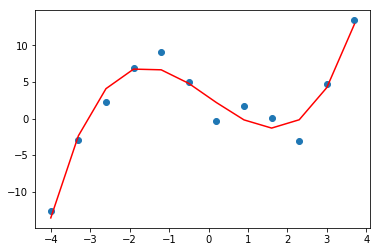

array([  1.99805689, -29.57951793,  -0.65950715,  55.94816829])

In [97]:
calculated_targets = hypotheses(W, features)
plt.scatter(X, Y)
plt.plot(X, calculated_targets, color='red')
plt.show()
W

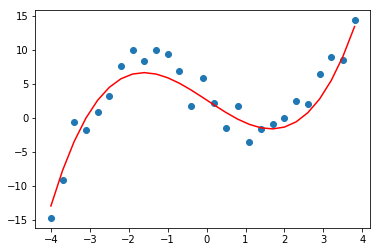

In [98]:
more_X = np.arange(-4, 4, 0.3)
more_Y = [secret(x) for x in more_X]
more_features = to_poly_features(more_X, proposed_degree)
more_features = mean_normalization(more_features)
more_targets = np.array(Y)

more_calculated_targets = hypotheses(W, more_features)
plt.scatter(more_X, more_Y)
plt.plot(more_X, more_calculated_targets, color='red')
plt.show()

# Let's play with real-life data!
